## Margin Improvement through Customized Pricing
•ZZ is an auto-parts retailer which sells a range of car parts and truck & trailer parts. Their customers could be individual garage owners with a single shop, or a larger chain of automobile workshops / in-house maintenance teams of fleet companies.

•ZZ has 350 locations across 40+ states of US, and have more than 100,000 parts that they sell in different categories (Transmission System, Engine Accessories, Cooling System, Lubes, HVAC systems, Tyres, Electricals, and Consumables). 
•Sales happen inside the store (no online), through customer – store associate interactions. Some sales also happen via delivery of products to customer locations. In both cases, ZZ’s associates could be interacting directly with the customer, or customer’s sales/procurement person. 

•As you can see, the business model is similar to classic retailing, but with some key differences: transactions are price negotiated between the customer & the store associate. Therefore, selling price vs base / recommended price being different. 

•While negotiated sales is a key feature of their business model, unscrupulous discounting could have a serious impact on the margins.

•ZZ likes to design a analytics driven discounting strategy, to provide a set of guidelines to the store associates on how to do smart pricing that results in a win-win for both the customers & ZZ. 
Attached is a sample data for one product category (Clutches).

Please outline your thoughts to help ZZ arrive at this strategy, backing up your recommendations with relevant analyses of the data provided. 
Depth of analyses, actionable insights, and how they could help address key business objectives + outcomes are all in focus for the audience. 

In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder



In [406]:
df=pd.read_excel('/Users/vallirajasekar/Desktop/New_project /Discount_Optimization/Experiment/0_Margin_Improvement_case_study_DS.docx_105553205264512.xlsx')

In [407]:
#pip install openpyxl

In [408]:
df['Sell_Date'] = pd.to_datetime(df['Sell_Date'], origin='1899-12-30',unit='D')

In [409]:
df.head()

,Trans_Num,Customer_Number,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,...,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name
0,77686701,1,0,2016-06-07,17.39,245_20970182,Clutch,1,929.17,628.980,...,929.17,628.98,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,TF,SOUTHWEST CALIF
1,66829575,3501,0,2015-02-20,25813.55,245_20970182,Clutch,1,943.96,607.070,...,943.96,628.98,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS
2,58890845,10070,0,2014-01-27,83574.66,245_20970182,Clutch,1,820.20,607.070,...,820.20,628.98,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS
3,73598323,10144,13,2015-11-18,78834.74,245_20970182,Clutch,1,868.80,622.748,...,868.80,628.98,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS
4,65139121,11404,22,2014-11-20,79565.88,245_20970182,Clutch,1,757.66,607.070,...,757.66,628.98,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS


In [410]:
df.shape

(5329, 23)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trans_Num              5329 non-null   int64         
 1   Customer_Number        5329 non-null   int64         
 2   Customer_Branch        5329 non-null   int64         
 3   Sell_Date              5329 non-null   datetime64[ns]
 4   Customer_LSTYR_Sales   2377 non-null   float64       
 5   product_id             5329 non-null   object        
 6   Part_Category          5329 non-null   object        
 7   Quantity_Shipped       5329 non-null   int64         
 8   Selling_Price          5329 non-null   float64       
 9   Selling_Cost           5329 non-null   float64       
 10  margin                 5329 non-null   float64       
 11  Unnamed: 11            1 non-null      float64       
 12  Unnamed: 12            1 non-null      float64       
 13  Bas

In [412]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Unnamed: 11', 'Unnamed: 12', 'Base_Price', 'DCOST', 'Price_Cluster',
       'Selling_Location', 'Location_Region', 'Customer_Salesman',
       'Territory_Salesperson', 'Territory_Names', 'Area_Manager',
       'Area_Name'],
      dtype='object')

In [413]:
df.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

In [414]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name'],
      dtype='object')

In [415]:
df['Profit_value']=df['Selling_Cost']*df['margin']
df['Cost_after_Margin']=df['Selling_Cost']-df['Profit_value']

In [416]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin'],
      dtype='object')

In [417]:
df.nunique()

Trans_Num                5321
Customer_Number          1116
Customer_Branch           238
Sell_Date                1045
Customer_LSTYR_Sales     1110
product_id                  1
Part_Category               1
Quantity_Shipped           11
Selling_Price             702
Selling_Cost                5
margin                    959
Base_Price                424
DCOST                       1
Price_Cluster               5
Selling_Location          235
Location_Region             4
Customer_Salesman         476
Territory_Salesperson     515
Territory_Names            27
Area_Manager               27
Area_Name                  27
Profit_value              959
Cost_after_Margin         959
dtype: int64

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trans_Num              5329 non-null   int64         
 1   Customer_Number        5329 non-null   int64         
 2   Customer_Branch        5329 non-null   int64         
 3   Sell_Date              5329 non-null   datetime64[ns]
 4   Customer_LSTYR_Sales   2377 non-null   float64       
 5   product_id             5329 non-null   object        
 6   Part_Category          5329 non-null   object        
 7   Quantity_Shipped       5329 non-null   int64         
 8   Selling_Price          5329 non-null   float64       
 9   Selling_Cost           5329 non-null   float64       
 10  margin                 5329 non-null   float64       
 11  Base_Price             5329 non-null   float64       
 12  DCOST                  5329 non-null   float64       
 13  Pri

In [419]:
df.isnull().sum()

Trans_Num                   0
Customer_Number             0
Customer_Branch             0
Sell_Date                   0
Customer_LSTYR_Sales     2952
product_id                  0
Part_Category               0
Quantity_Shipped            0
Selling_Price               0
Selling_Cost                0
margin                      0
Base_Price                  0
DCOST                       0
Price_Cluster               0
Selling_Location            0
Location_Region             0
Customer_Salesman        2952
Territory_Salesperson       2
Territory_Names            24
Area_Manager                0
Area_Name                   0
Profit_value                0
Cost_after_Margin           0
dtype: int64

In [420]:
df.isnull().sum()/len(df)*100

Trans_Num                 0.000000
Customer_Number           0.000000
Customer_Branch           0.000000
Sell_Date                 0.000000
Customer_LSTYR_Sales     55.395008
product_id                0.000000
Part_Category             0.000000
Quantity_Shipped          0.000000
Selling_Price             0.000000
Selling_Cost              0.000000
margin                    0.000000
Base_Price                0.000000
DCOST                     0.000000
Price_Cluster             0.000000
Selling_Location          0.000000
Location_Region           0.000000
Customer_Salesman        55.395008
Territory_Salesperson     0.037530
Territory_Names           0.450366
Area_Manager              0.000000
Area_Name                 0.000000
Profit_value              0.000000
Cost_after_Margin         0.000000
dtype: float64

## Exploration of Data

In [421]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date', 'Customer_LSTYR_Sales', 'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin', 'Base_Price', 'DCOST', 'Customer_Salesman', 'Profit_value', 'Cost_after_Margin']

We have 9 categorical features : ['product_id', 'Part_Category', 'Price_Cluster', 'Selling_Location', 'Location_Region', 'Territory_Salesperson', 'Territory_Names', 'Area_Manager', 'Area_Name']


In [422]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

product_id
245_20970182    100.0
Name: proportion, dtype: float64
---------------------------
Part_Category
Clutch    100.0
Name: proportion, dtype: float64
---------------------------
Price_Cluster
PRC2    36.779884
PRC3    31.413023
PRC1    22.443235
PRC4     8.632014
PRC0     0.731845
Name: proportion, dtype: float64
---------------------------
Selling_Location
ONT    3.865641
TOL    3.190092
WCA    2.946144
SLC    2.495778
ATL    2.214299
         ...   
DTS    0.018765
LAN    0.018765
CSH    0.018765
MAN    0.018765
HAS    0.018765
Name: proportion, Length: 235, dtype: float64
---------------------------
Location_Region
SOUTHEAST    35.222368
WEST         26.496528
NORTHEAST    20.210171
CENTRAL      18.070933
Name: proportion, dtype: float64
---------------------------
Territory_Salesperson
OPEN       7.302422
TS211      1.745823
CALL151    1.651962
TS309      1.520556
TS173      1.483011
             ...   
CALL73     0.018772
CALL111    0.018772
CALL103    0.018772
TS261      0

## Univariate Analysis
The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.
Other Type of Analysis are

## Bivariate Analysis: The analysis of two variables.
## Multivariate Analysis: The analysis of two or more variables.

## Numerical Features 

In [423]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin'],
      dtype='object')

In [424]:
df_new_1.head()

,Customer_LSTYR_Sales,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin
0,17.39,Clutch,1,929.17,628.980,0.323073,929.17,628.98,PRC2,COI,WEST,TS222,SOCAL WEST,TF,SOUTHWEST CALIF,203.206632,425.773368
1,25813.55,Clutch,1,943.96,607.070,0.356890,943.96,628.98,PRC1,AL,CENTRAL,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS,216.657287,390.412713
2,83574.66,Clutch,1,820.20,607.070,0.259851,820.20,628.98,PRC1,CC,CENTRAL,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS,157.747902,449.322098
3,78834.74,Clutch,1,868.80,622.748,0.283209,868.80,628.98,PRC1,CC,CENTRAL,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS,176.367853,446.380147
4,79565.88,Clutch,1,757.66,607.070,0.198757,757.66,628.98,PRC1,CC,CENTRAL,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS,120.659229,486.410771


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_8924/465812644.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[numeric_features[i]], color='blue')


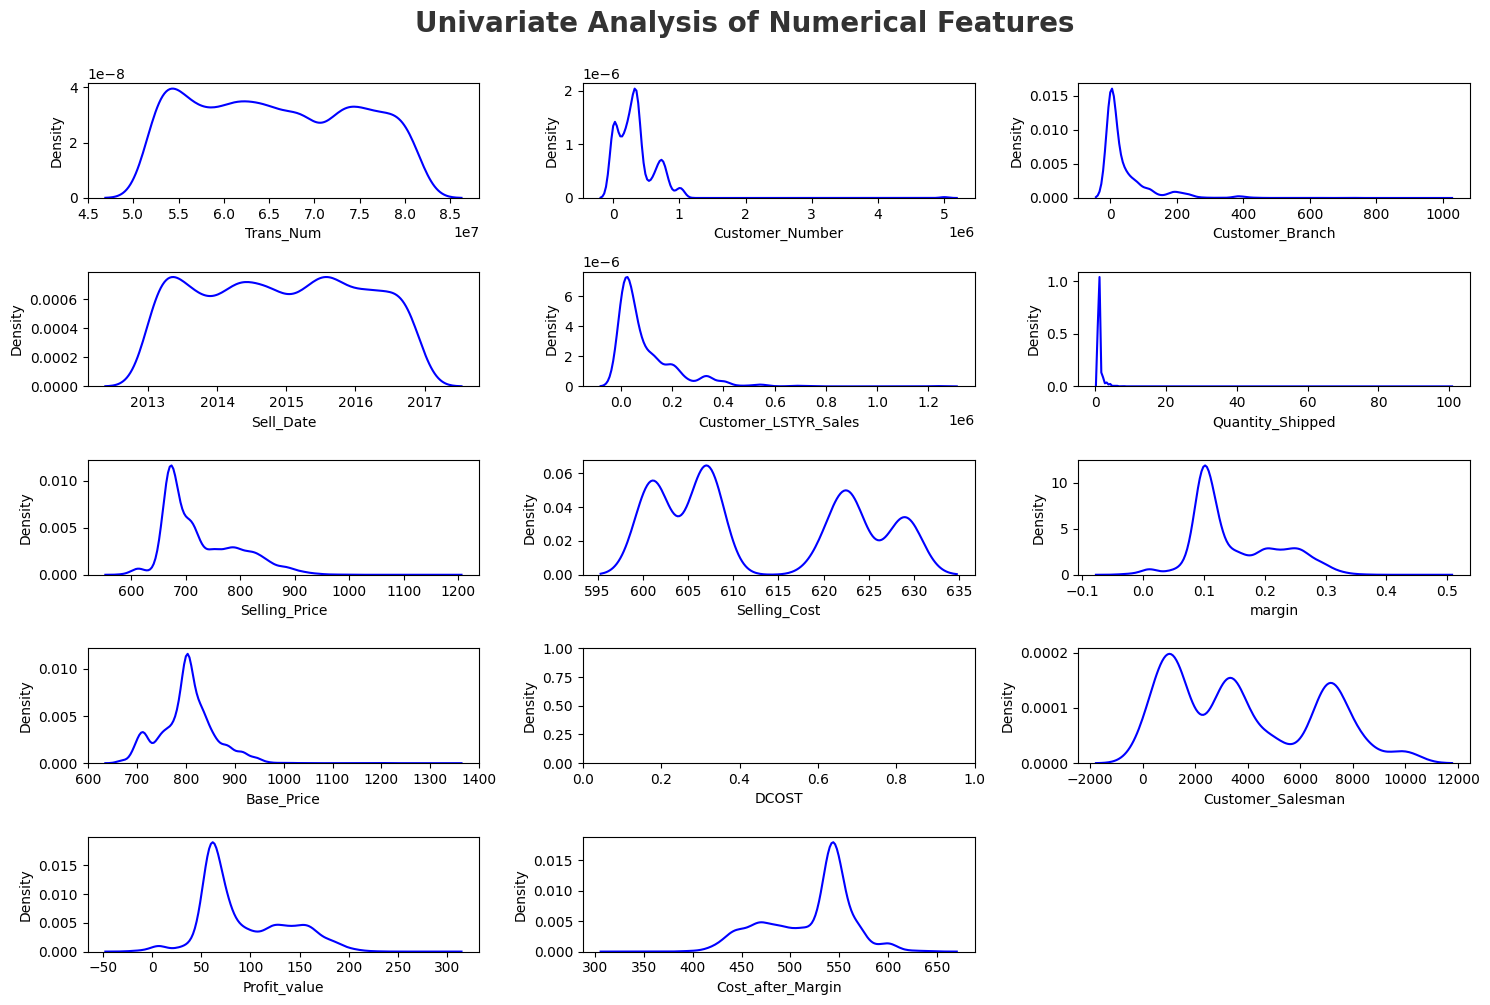

In [425]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    

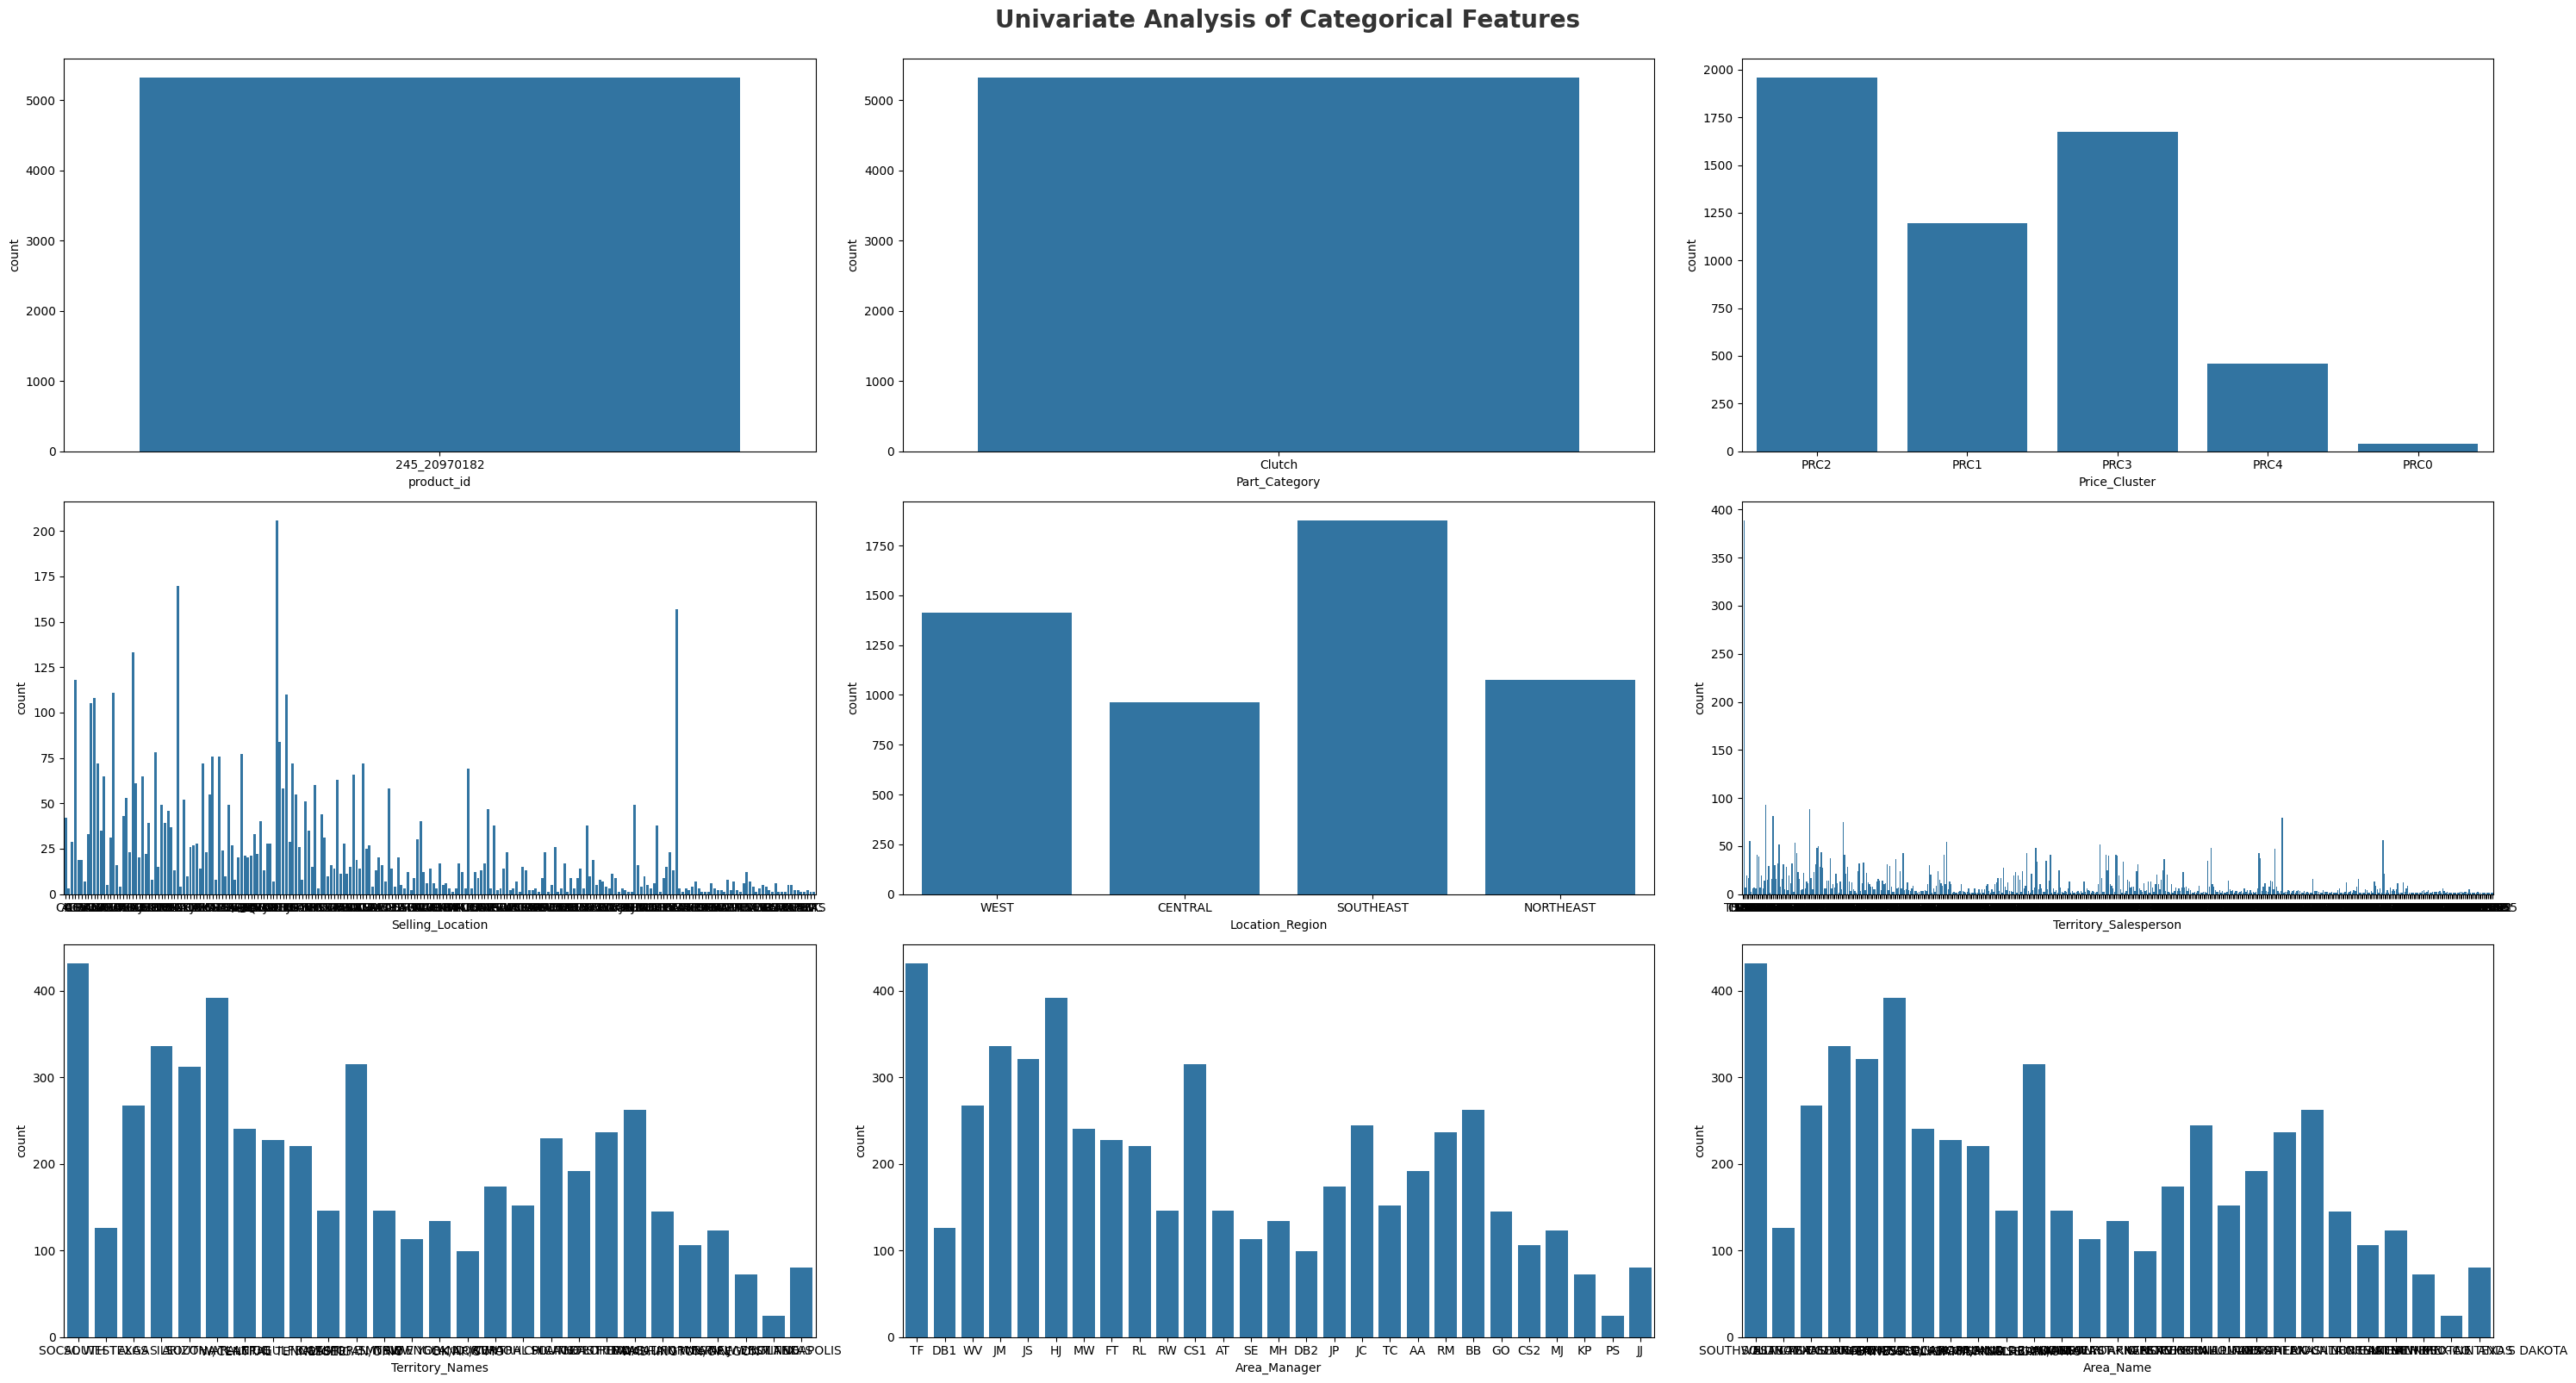

In [426]:
# categorical columns
#categorical_features.remove('case_id')
plt.figure(figsize=(30, 16))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [427]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 3 discrete features : ['Quantity_Shipped', 'Selling_Cost', 'DCOST']

We have 11 continuous_features : ['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date', 'Customer_LSTYR_Sales', 'Selling_Price', 'margin', 'Base_Price', 'Customer_Salesman', 'Profit_value', 'Cost_after_Margin']


In [428]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['margin'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,product_id,Fail to Reject Null Hypothesis
1,Part_Category,Fail to Reject Null Hypothesis
2,Price_Cluster,Reject Null Hypothesis
3,Selling_Location,Reject Null Hypothesis
4,Location_Region,Reject Null Hypothesis
5,Territory_Salesperson,Reject Null Hypothesis
6,Territory_Names,Reject Null Hypothesis
7,Area_Manager,Reject Null Hypothesis
8,Area_Name,Reject Null Hypothesis


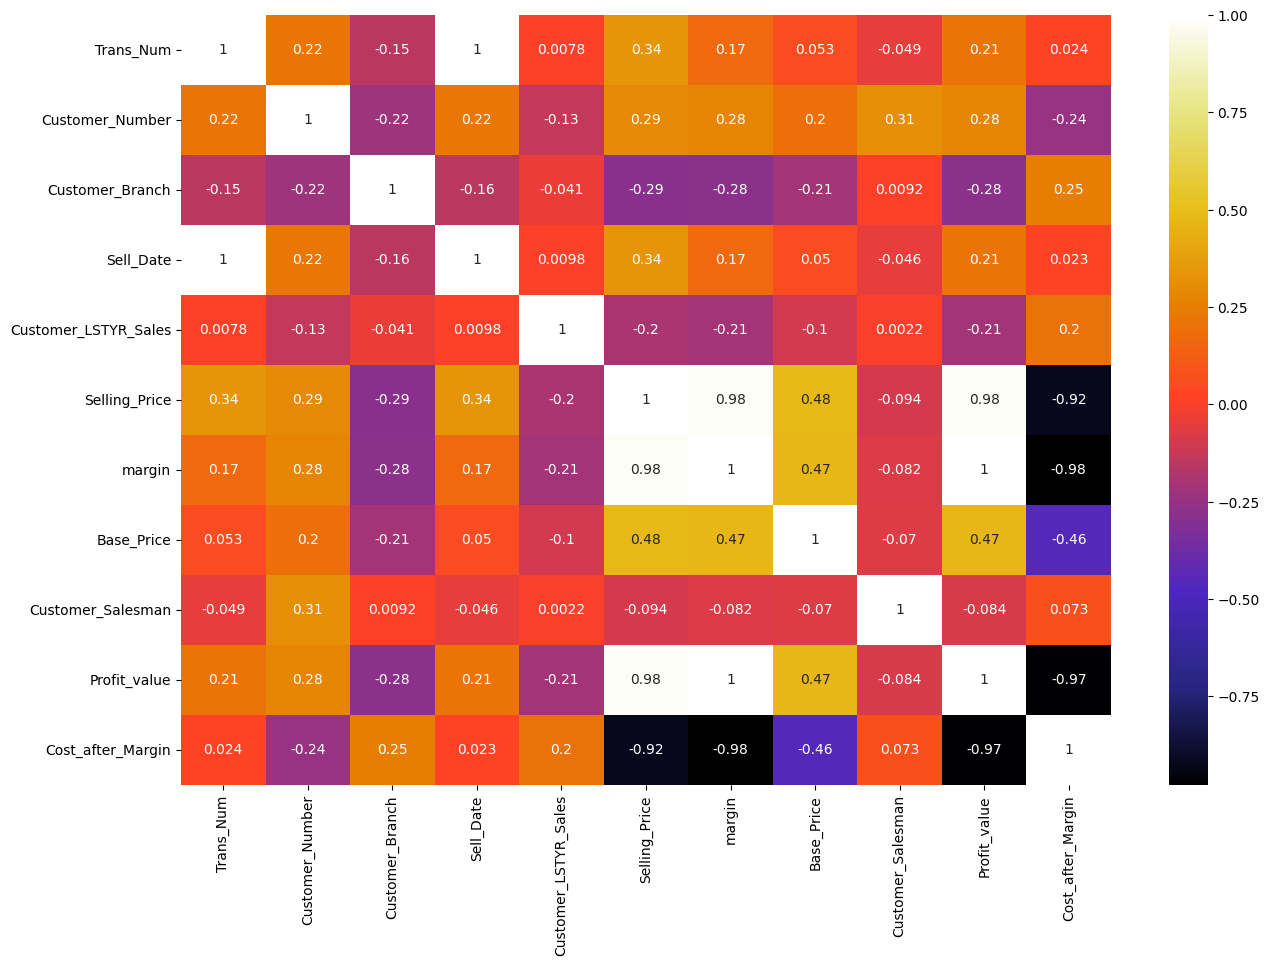

In [429]:
plt.figure(figsize = (15,10))
sns.heatmap(df[continuous_features].corr(), cmap="CMRmap", annot=True)
plt.show()

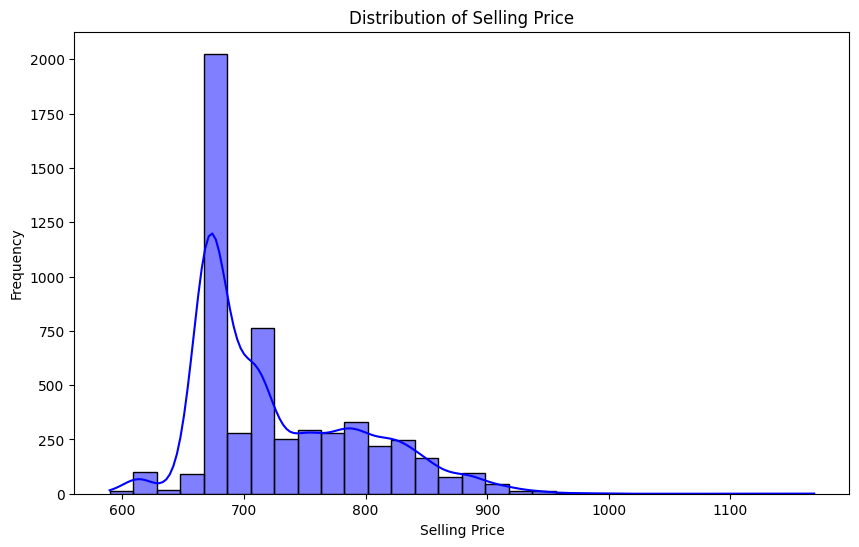

In [430]:
plt.figure(figsize=(10,6))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


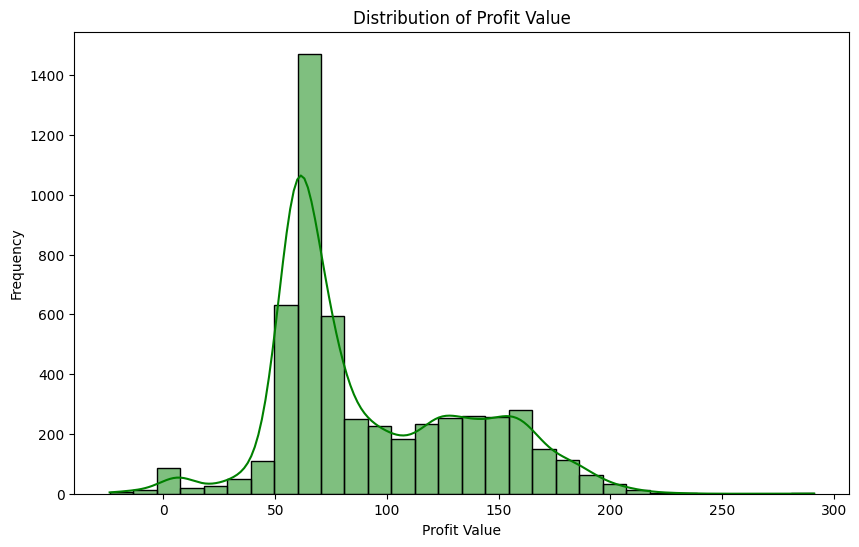

In [431]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit_value'], bins=30, kde=True, color='green')
plt.title('Distribution of Profit Value')
plt.xlabel('Profit Value')
plt.ylabel('Frequency')
plt.show()


In [432]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin'],
      dtype='object')

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_8924/4256034175.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Selling_Price', y='Profit_value', data=df, palette='Set1')


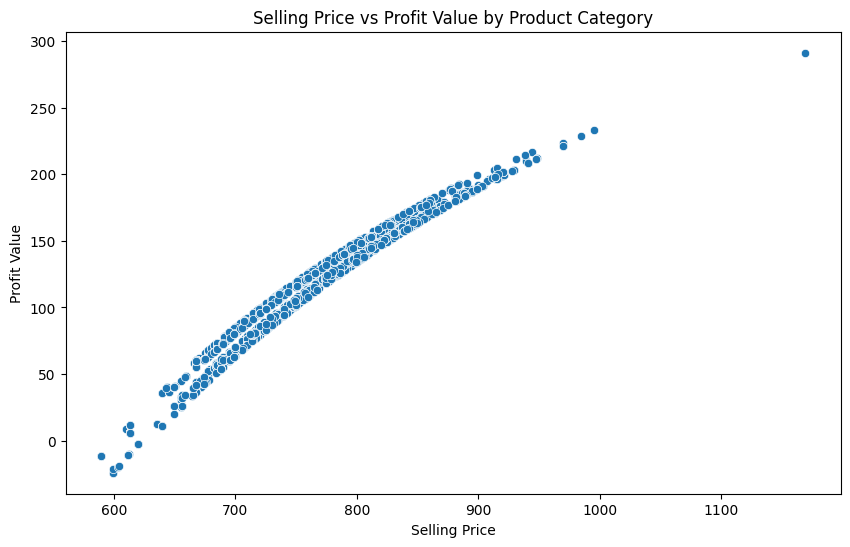

In [433]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Selling_Price', y='Profit_value', data=df, palette='Set1')
plt.title('Selling Price vs Profit Value by Product Category')
plt.xlabel('Selling Price')
plt.ylabel('Profit Value')
plt.show()


In [434]:
df.columns

Index(['Trans_Num', 'Customer_Number', 'Customer_Branch', 'Sell_Date',
       'Customer_LSTYR_Sales', 'product_id', 'Part_Category',
       'Quantity_Shipped', 'Selling_Price', 'Selling_Cost', 'margin',
       'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin'],
      dtype='object')

In [435]:
df.drop(['Trans_Num','Customer_Number'],axis=1,inplace=True)

In [436]:
df['Sell_Date'] = pd.to_datetime(df['Sell_Date'], format='%Y-%m-%d')


In [437]:
df['Sell_Date'] = pd.to_datetime(df['Sell_Date'], format='mixed')  # Assuming YYYYMMDD format

In [438]:
df

,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,...,Price_Cluster,Selling_Location,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin
0,0,2016-06-07,17.39,245_20970182,Clutch,1,929.17,628.980,0.323073,929.17,...,PRC2,COI,WEST,154.0,TS222,SOCAL WEST,TF,SOUTHWEST CALIF,203.206632,425.773368
1,0,2015-02-20,25813.55,245_20970182,Clutch,1,943.96,607.070,0.356890,943.96,...,PRC1,AL,CENTRAL,16.0,OPEN,SOUTH TEXAS,DB1,SOUTH TEXAS,216.657287,390.412713
2,0,2014-01-27,83574.66,245_20970182,Clutch,1,820.20,607.070,0.259851,820.20,...,PRC1,CC,CENTRAL,109.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS,157.747902,449.322098
3,13,2015-11-18,78834.74,245_20970182,Clutch,1,868.80,622.748,0.283209,868.80,...,PRC1,CC,CENTRAL,111.0,TS117,SOUTH TEXAS,DB1,SOUTH TEXAS,176.367853,446.380147
4,22,2014-11-20,79565.88,245_20970182,Clutch,1,757.66,607.070,0.198757,757.66,...,PRC1,CC,CENTRAL,3.0,TS251,SOUTH TEXAS,DB1,SOUTH TEXAS,120.659229,486.410771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,2016-02-17,8875.18,245_20970182,Clutch,1,775.45,620.360,0.200000,934.76,...,PRC1,HUN,SOUTHEAST,1060.0,TS120,W/CENTRAL TENNESSEE,FT,TENNESSEE/NORTHERN ALABAMA,124.072000,496.288000
5325,0,2016-01-26,4662.08,245_20970182,Clutch,1,811.32,620.360,0.235370,811.32,...,PRC2,PHX,WEST,8812.0,CALL155,ARIZONA,JS,SOUTHWEST,146.013836,474.346164
5326,0,2016-08-17,157.18,245_20970182,Clutch,1,898.54,628.980,0.299998,1015.01,...,PRC0,PH,CENTRAL,322.0,TS148,SOUTH TEXAS,DB1,SOUTH TEXAS,188.692600,440.287400
5327,0,2015-12-10,950.44,245_20970182,Clutch,1,811.32,622.748,0.232426,811.32,...,PRC2,TAM,SOUTHEAST,1355.0,CALL150,SOUTH FLORIDA,AA,FLORIDA,144.742932,478.005068


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_8924/260665059.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Branch', y='Quantity_Shipped', data=df_top_15_sales, ci=None, order=top_15_sales_branches['Customer_Branch'])


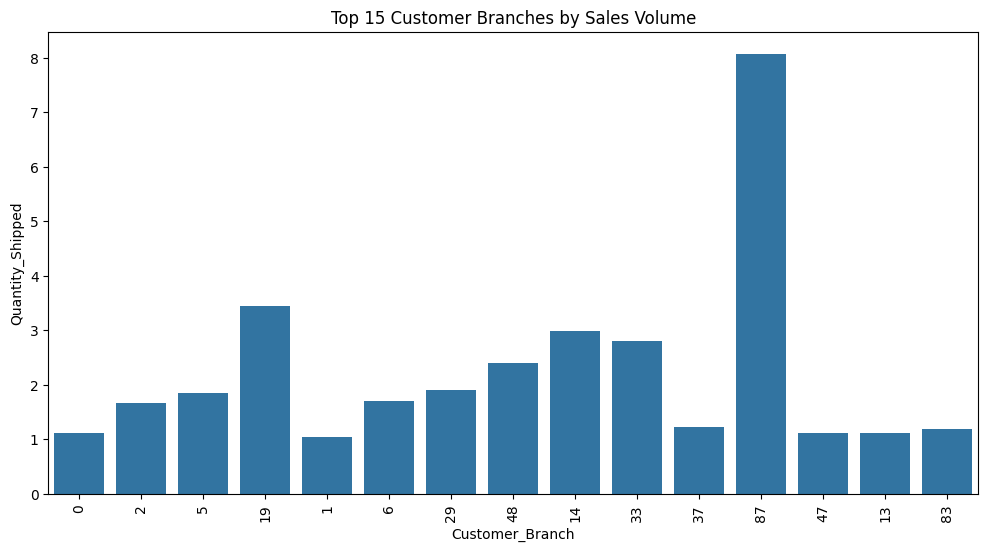

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_8924/260665059.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer_Branch', y='margin', data=df_top_15_sales, ci=None, color='green')


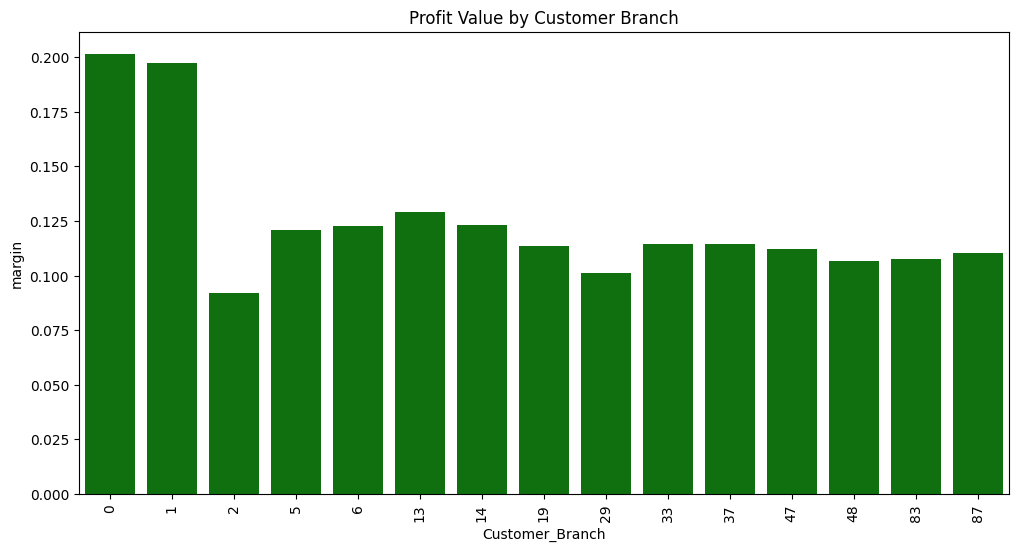

In [439]:
# Group by Customer_Branch and sum the Quantity_Shipped
top_15_sales_branches = df.groupby('Customer_Branch')['Quantity_Shipped'].sum().nlargest(15).reset_index()

# Filter the DataFrame to only include the top 15 branches
df_top_15_sales = df[df['Customer_Branch'].isin(top_15_sales_branches['Customer_Branch'])]

# Plot the bar chart for top 15 customer branches by sales volume
plt.figure(figsize=(12,6))
sns.barplot(x='Customer_Branch', y='Quantity_Shipped', data=df_top_15_sales, ci=None, order=top_15_sales_branches['Customer_Branch'])
plt.title('Top 15 Customer Branches by Sales Volume')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Customer_Branch', y='margin', data=df_top_15_sales, ci=None, color='green')
plt.title('Profit Value by Customer Branch')
plt.xticks(rotation=90)
plt.show()

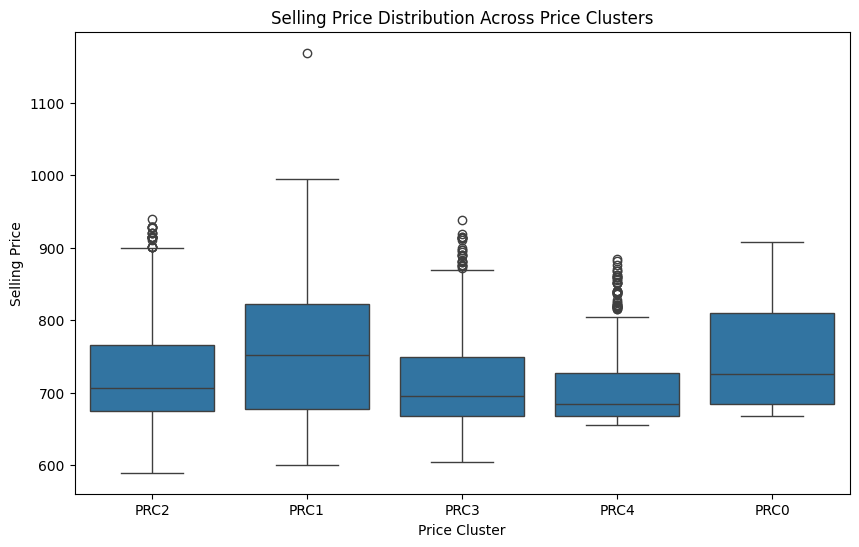

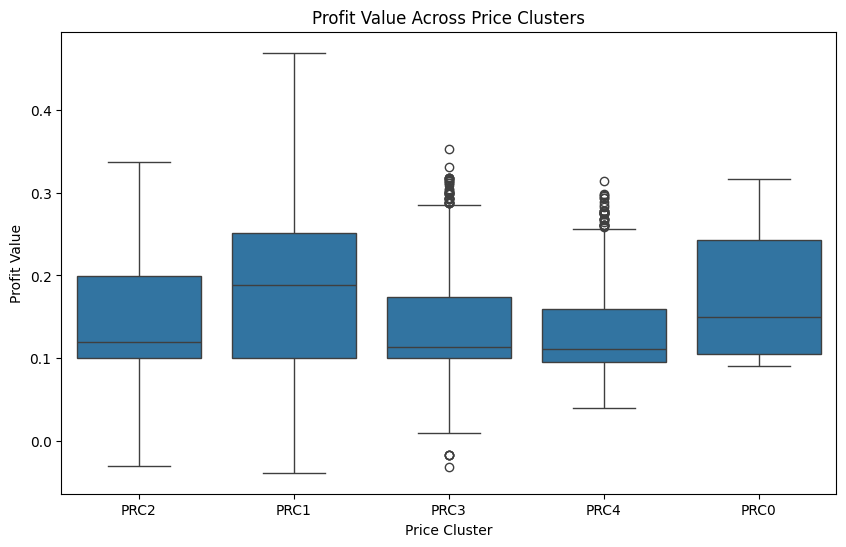

In [440]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Cluster', y='Selling_Price', data=df)
plt.title('Selling Price Distribution Across Price Clusters')
plt.xlabel('Price Cluster')
plt.ylabel('Selling Price')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Price_Cluster', y='margin', data=df)
plt.title('Profit Value Across Price Clusters')
plt.xlabel('Price Cluster')
plt.ylabel('Profit Value')
plt.show()


In [441]:
df.columns

Index(['Customer_Branch', 'Sell_Date', 'Customer_LSTYR_Sales', 'product_id',
       'Part_Category', 'Quantity_Shipped', 'Selling_Price', 'Selling_Cost',
       'margin', 'Base_Price', 'DCOST', 'Price_Cluster', 'Selling_Location',
       'Location_Region', 'Customer_Salesman', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin'],
      dtype='object')

In [442]:
print(df[['Selling_Price','Selling_Cost', 'margin', 'Profit_value', 'Cost_after_Margin']].head())


   Selling_Price  Selling_Cost    margin  Profit_value  Cost_after_Margin
0         929.17       628.980  0.323073    203.206632         425.773368
1         943.96       607.070  0.356890    216.657287         390.412713
2         820.20       607.070  0.259851    157.747902         449.322098
3         868.80       622.748  0.283209    176.367853         446.380147
4         757.66       607.070  0.198757    120.659229         486.410771


In [443]:
df['Discount_Offered'] = (df['Base_Price'] - df['Selling_Price']) / df['Base_Price']
df['Excessive_Discount'] = df['Discount_Offered'].apply(lambda x: 1 if x > 0.10 else 0)



In [444]:
print(df[['Selling_Price','Selling_Cost', 'margin', 'Profit_value', 'Cost_after_Margin','Discount_Offered','Base_Price','Selling_Price','Excessive_Discount']].head(10))


   Selling_Price  Selling_Cost    margin  Profit_value  Cost_after_Margin  \
0         929.17       628.980  0.323073    203.206632         425.773368   
1         943.96       607.070  0.356890    216.657287         390.412713   
2         820.20       607.070  0.259851    157.747902         449.322098   
3         868.80       622.748  0.283209    176.367853         446.380147   
4         757.66       607.070  0.198757    120.659229         486.410771   
5         817.45       601.067  0.264705    159.105365         441.961635   
6         820.20       601.067  0.267170    160.587192         440.479808   
7         773.75       607.070  0.215418    130.774058         476.295942   
8         839.53       622.748  0.258218    160.804923         461.943077   
9         839.53       628.980  0.250795    157.745094         471.234906   

   Discount_Offered  Base_Price  Selling_Price  Excessive_Discount  
0               0.0      929.17         929.17                   0  
1             

In [445]:
df['Excessive_Discount'].value_counts()

Excessive_Discount
1    2825
0    2504
Name: count, dtype: int64

In [446]:
#6281043403

In [449]:
# Encode categorical variables
#categorical_cols = ['Customer_Branch','Price_Cluster', 'Selling_Location', 'Location_Region']
for col in categorical_features:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values if any
#df.fillna(0, inplace=True)

In [450]:
df

,Customer_Branch,Sell_Date,Customer_LSTYR_Sales,product_id,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,...,Location_Region,Customer_Salesman,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin,Discount_Offered,Excessive_Discount
0,0,2016-06-07,17.39,0,0,1,929.17,628.980,0.323073,929.17,...,3,154.0,315,19,25,24,203.206632,425.773368,0.000000,0
1,0,2015-02-20,25813.55,0,0,1,943.96,607.070,0.356890,943.96,...,0,16.0,176,22,5,21,216.657287,390.412713,0.000000,0
2,0,2014-01-27,83574.66,0,0,1,820.20,607.070,0.259851,820.20,...,0,109.0,347,22,5,21,157.747902,449.322098,0.000000,0
3,13,2015-11-18,78834.74,0,0,1,868.80,622.748,0.283209,868.80,...,0,111.0,198,22,5,21,176.367853,446.380147,0.000000,0
4,22,2014-11-20,79565.88,0,0,1,757.66,607.070,0.198757,757.66,...,0,3.0,347,22,5,21,120.659229,486.410771,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,2016-02-17,8875.18,0,0,1,775.45,620.360,0.200000,934.76,...,2,1060.0,202,23,7,25,124.072000,496.288000,0.170429,1
5325,0,2016-01-26,4662.08,0,0,1,811.32,620.360,0.235370,811.32,...,3,8812.0,62,1,14,23,146.013836,474.346164,0.000000,0
5326,0,2016-08-17,157.18,0,0,1,898.54,628.980,0.299998,1015.01,...,0,322.0,232,22,5,21,188.692600,440.287400,0.114748,1
5327,0,2015-12-10,950.44,0,0,1,811.32,622.748,0.232426,811.32,...,2,1355.0,57,21,0,5,144.742932,478.005068,0.000000,0


In [452]:
df.drop(['Customer_LSTYR_Sales','Customer_Salesman'],axis=1,inplace=True)

In [453]:
df.isnull().sum()

Customer_Branch          0
Sell_Date                0
product_id               0
Part_Category            0
Quantity_Shipped         0
Selling_Price            0
Selling_Cost             0
margin                   0
Base_Price               0
DCOST                    0
Price_Cluster            0
Selling_Location         0
Location_Region          0
Territory_Salesperson    0
Territory_Names          0
Area_Manager             0
Area_Name                0
Profit_value             0
Cost_after_Margin        0
Discount_Offered         0
Excessive_Discount       0
dtype: int64

In [455]:
df.drop(['product_id'], axis=1, inplace=True)


In [462]:
df.head()

,Customer_Branch,Sell_Date,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin,Discount_Offered,Excessive_Discount
0,0,2016-06-07,0,1,929.17,628.980,0.323073,929.17,628.98,2,45,3,315,19,25,24,203.206632,425.773368,0.0,0
1,0,2015-02-20,0,1,943.96,607.070,0.356890,943.96,628.98,1,4,0,176,22,5,21,216.657287,390.412713,0.0,0
2,0,2014-01-27,0,1,820.20,607.070,0.259851,820.20,628.98,1,35,0,347,22,5,21,157.747902,449.322098,0.0,0
3,13,2015-11-18,0,1,868.80,622.748,0.283209,868.80,628.98,1,35,0,198,22,5,21,176.367853,446.380147,0.0,0
4,22,2014-11-20,0,1,757.66,607.070,0.198757,757.66,628.98,1,35,0,347,22,5,21,120.659229,486.410771,0.0,0


In [473]:
df.drop(['Sell_Date'],axis=1,inplace=True)

In [474]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Branch        5329 non-null   int64         
 1   Sell_Date              5329 non-null   datetime64[ns]
 2   Part_Category          5329 non-null   int64         
 3   Quantity_Shipped       5329 non-null   int64         
 4   Selling_Price          5329 non-null   float64       
 5   Selling_Cost           5329 non-null   float64       
 6   Base_Price             5329 non-null   float64       
 7   DCOST                  5329 non-null   float64       
 8   Price_Cluster          5329 non-null   int64         
 9   Selling_Location       5329 non-null   int64         
 10  Location_Region        5329 non-null   int64         
 11  Territory_Salesperson  5329 non-null   int64         
 12  Territory_Names        5329 non-null   int64         
 13  Are

In [486]:
df.columns

Index(['Customer_Branch', 'Part_Category', 'Quantity_Shipped', 'Selling_Price',
       'Selling_Cost', 'margin', 'Base_Price', 'DCOST', 'Price_Cluster',
       'Selling_Location', 'Location_Region', 'Territory_Salesperson',
       'Territory_Names', 'Area_Manager', 'Area_Name', 'Profit_value',
       'Cost_after_Margin', 'Discount_Offered', 'Excessive_Discount',
       'Recommended_Price'],
      dtype='object')

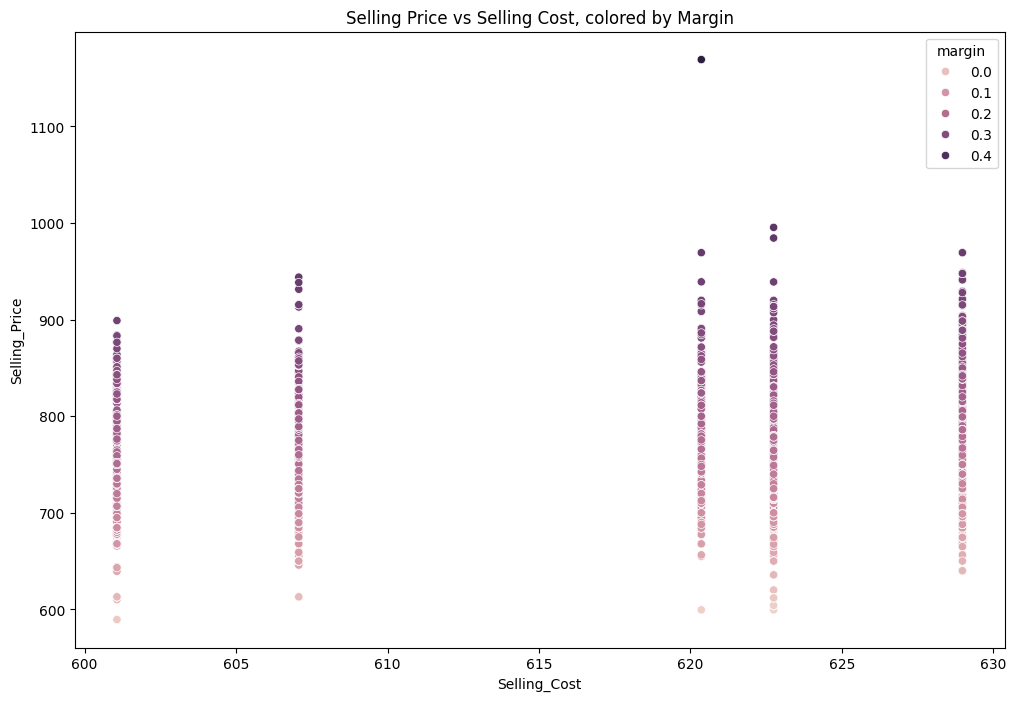

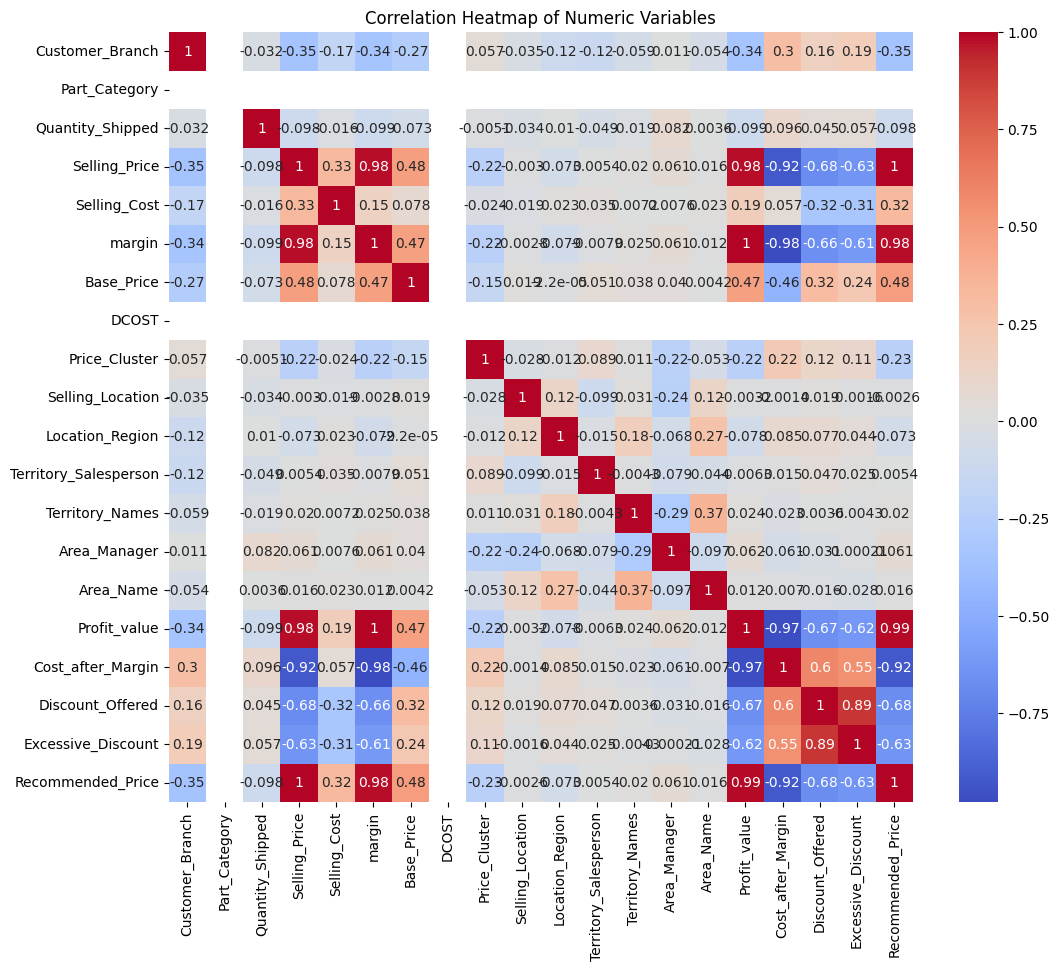

In [488]:
# Scatter plot of Selling_Price vs Selling_Cost, colored by margin
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Selling_Cost', y='Selling_Price', hue='margin', data=df)
plt.title('Selling Price vs Selling Cost, colored by Margin')
plt.show()

# Correlation heatmap of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

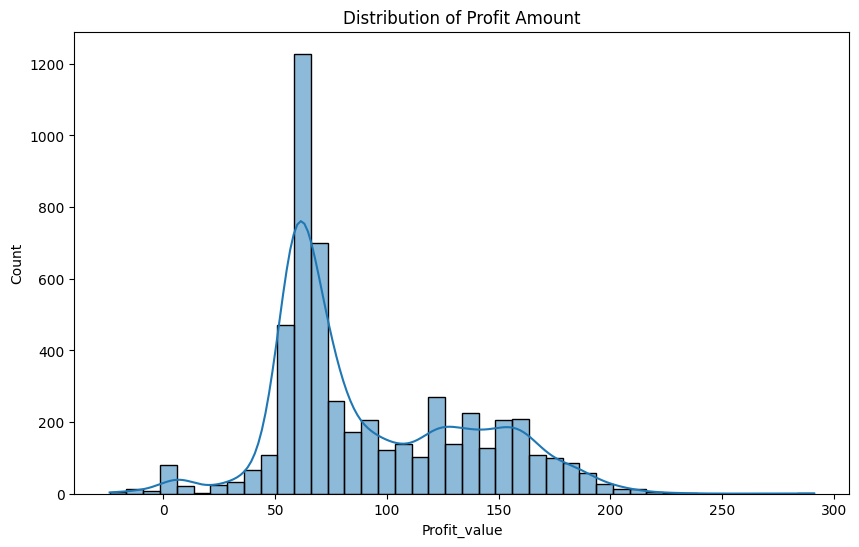

In [487]:
# Histogram of Profit_Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit_value'], kde=True)
plt.title('Distribution of Profit Amount')
plt.show()

In [475]:
X_regression = df.drop(['margin', 'Profit_value', 'Cost_after_Margin', 'Excessive_Discount'], axis=1)
y_regression = df['margin']

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [476]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [477]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [478]:
y_pred_reg = regressor.predict(X_test_reg)


In [481]:
# Evaluate the regression model
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'RMSE: {rmse}')
print(f'R-Squared: {r2}')

RMSE: 0.0013712181995910806
R-Squared: 0.9996111325560997


In [482]:
# Define a function to recommend the optimal price
def recommend_price(base_price, predicted_margin, cost):
    target_margin = predicted_margin * 1.05  # Increase by 5% to aim for better profitability
    recommended_price = cost / (1 - target_margin)
    return recommended_price


In [484]:
df['Recommended_Price'] = df.apply(lambda x: recommend_price(x['Base_Price'], x['margin'], x['Selling_Cost']), axis=1)


In [485]:
df

,Customer_Branch,Part_Category,Quantity_Shipped,Selling_Price,Selling_Cost,margin,Base_Price,DCOST,Price_Cluster,Selling_Location,Location_Region,Territory_Salesperson,Territory_Names,Area_Manager,Area_Name,Profit_value,Cost_after_Margin,Discount_Offered,Excessive_Discount,Recommended_Price
0,0,0,1,929.17,628.980,0.323073,929.17,628.98,2,45,3,315,19,25,24,203.206632,425.773368,0.000000,0,951.885061
1,0,0,1,943.96,607.070,0.356890,943.96,628.98,1,4,0,176,22,5,21,216.657287,390.412713,0.000000,0,970.899762
2,0,0,1,820.20,607.070,0.259851,820.20,628.98,1,35,0,347,22,5,21,157.747902,449.322098,0.000000,0,834.855036
3,13,0,1,868.80,622.748,0.283209,868.80,628.98,1,35,0,198,22,5,21,176.367853,446.380147,0.000000,0,886.309345
4,22,0,1,757.66,607.070,0.198757,757.66,628.98,1,35,0,347,22,5,21,120.659229,486.410771,0.000000,0,767.175289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0,1,775.45,620.360,0.200000,934.76,628.98,1,99,2,202,23,7,25,124.072000,496.288000,0.170429,1,785.265823
5325,0,0,1,811.32,620.360,0.235370,811.32,628.98,2,167,3,62,1,14,23,146.013836,474.346164,0.000000,0,824.002271
5326,0,0,1,898.54,628.980,0.299998,1015.01,628.98,0,165,0,232,22,5,21,188.692600,440.287400,0.114748,1,918.215845
5327,0,0,1,811.32,622.748,0.232426,811.32,628.98,2,211,2,57,21,0,5,144.742932,478.005068,0.000000,0,823.792476
